<a href="https://colab.research.google.com/github/hcgalvantech/proyecto_integrado_2x/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas de nivel secundario
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Función para generar un nombre y apellido aleatorio
def generar_nombre_apellido():
  nombres = ["Juan", "María", "Pedro", "Laura", "Carlos", "Ana", "Luis", "Marta", "Diego", "Sofia"]
  apellidos = ["Gómez", "Pérez", "Rodríguez", "Fernández", "López", "García", "Martínez", "Sánchez", "González", "Romero"]
  return random.choice(nombres) + " " + random.choice(apellidos)

# Función para generar un DNI aleatorio
def generar_dni():
  return random.randint(10000000, 99999999)

# Generar datos para 100 filas
data = []
for _ in range(100):
  nombre_apellido = generar_nombre_apellido()
  dni = generar_dni()
  materia = random.choice(materias)
  nota_1er_trimestre = round(random.uniform(1, 10), 2)
  nota_2do_trimestre = round(random.uniform(1, 10), 2)
  nota_3er_trimestre = round(random.uniform(1, 10), 2)
  faltas = random.randint(0, 15)
  data.append([nombre_apellido, dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=["Nombre y Apellido", "Nro. DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

# Mostrar el DataFrame
df

,Nombre y Apellido,Nro. DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Diego González,36774879,Historia,2.64,2.74,8.47,13
1,María Sánchez,55700570,Informática,6.93,5.44,6.24,1
2,Marta López,26073385,Educación Física,3.54,4.00,2.77,13
3,María Martínez,90089932,Lengua y Literatura,4.29,4.97,6.46,3
4,Laura García,85796172,Inglés,9.77,4.49,1.49,6
...,...,...,...,...,...,...,...
95,Carlos Pérez,59699431,Química,6.80,5.30,1.13,13
96,Laura Romero,95899782,Física,4.24,9.28,8.78,8
97,Luis Pérez,46351628,Inglés,5.78,5.96,2.43,0
98,Carlos Rodríguez,32318669,Inglés,3.41,6.59,5.44,13


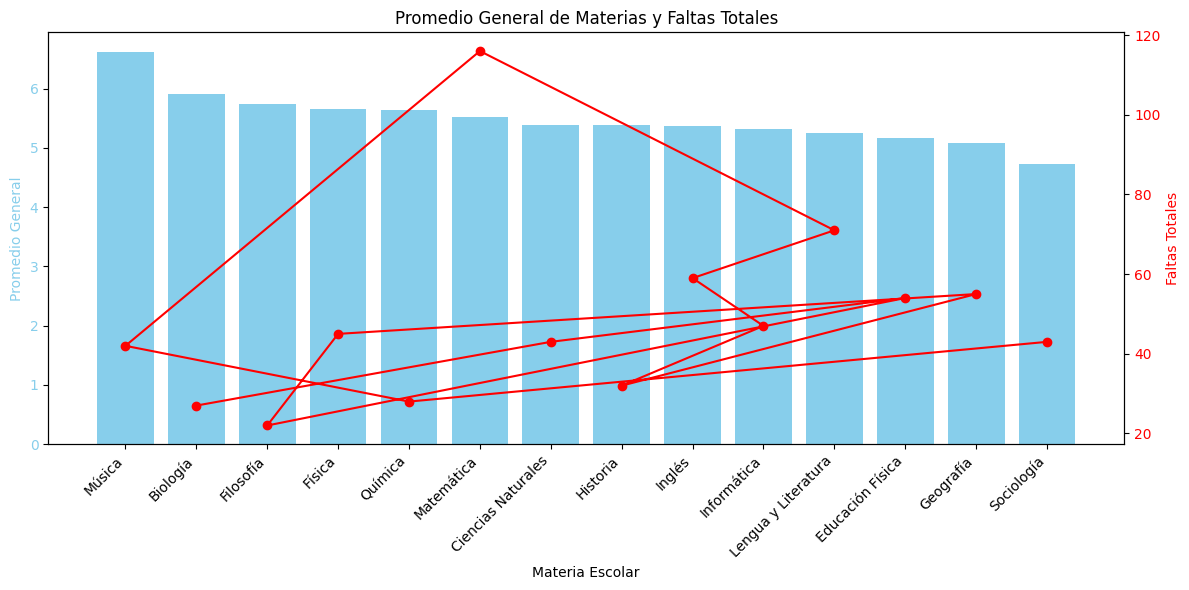

In [5]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias de mayor a menor promedio
promedio_por_materia_ordenado = promedio_por_materia.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras para el promedio general
ax1.bar(promedio_por_materia_ordenado.index, promedio_por_materia_ordenado.values, color='skyblue')
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de Materias y Faltas Totales')
plt.xticks(rotation=45, ha='right')

# Crear el eje secundario para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Ajustar el diseño para evitar superposición
fig.tight_layout()

# Mostrar el gráfico
plt.show()

In [6]:
df.to_csv("datos_alumnos.csv", index=False)